 1. Implement the stochastic inventory control model in CVXPY with the following data.

 (a) Demand d can take 5 values: d1 = 10, d2 = 20, d3 = 30, d4 = 40, d5 = 50, with probability p1 = 0.1, p2 = 0.15, p3 = 0.3, p4 = 0.25; P5 = 0.2, respectively.

 (b) Unit cost c = 10, retail price r = 15, discount price s = 5.

 (c) Production capacity $x_{max}$ = 75. This is the upper bound of production capacity.

 Submit your code and the optimal solution.

**Solution to Question 1**:
 The problem can be translated mathamatically to the following:
 $$min(cx + \sum^S_{i = 1} p_i(-ry_i - sz_i))$$

Subject to

$$0 <= x <= x_{max}$$

$$y_i <= d_i$$

$$-x + y_i + z_i <= 0$$

$$y_i >= 0$$
$$z_i >= 0$$

 x is the amount of product to manufactured beforehand

 r is regular selling price

 $y_i$ is the selling quantity at regular price at each scenario

 s is the discounted price

 $z_i$ is the quantity that sells at the discounted price at each scenario

In [1]:
# import library
import numpy as np
import pandas as pd
import cvxpy as cp


In [2]:

#Intialize known variables

d = [10,20,30,40,50]   #demand
p = [0.1, 0.15, 0.3, 0.25, 0.2]  #probablity of demand
c = 10  # cost
r = 15  # retail price
s = 5   # discount price
xmax = 75   # production capacity

cases = len(d)
#Create decision variables

x = cp.Variable()
y = [cp.Variable() for i in range(0, cases)]
z = [cp.Variable() for i in range(0, cases)]

# A is the all the iteration  of p * (d*y + s*z)
A = [p[i]*(r*y[i] + s*z[i]) for i in range (0, cases)]

objective = cp.Minimize(c*x - cp.sum(A))


# Create constraints
constraint1 = [x >= 0, x<= xmax]

#quantity sold at regular price must be less then demand
constraint2 = [y[i]<=d[i] for i in range(0, cases)]

# Total quantity sold must be less or equal to quantity manufactured
constraint3 = [-x + y[i] + z[i] <= 0 for i in range(0, cases)]

# The quantity sold must be a nonnegative number
constraint4 = [y[i]>=0 for i in range(0, cases)]
constraint5 = [z[i]>=0 for i in range(0, cases)]

constaints = constraint1 + constraint2 + constraint3 + constraint4 + constraint5

prob = cp.Problem(objective,constaints)

prob.solve()
print (f"Optimal Objective Value: {prob.value}")

print (f"x = {x.value}")
for i in range(cases):
    print (f"y_{i+1}: {y[i].value:.2f}")

for i in range(cases):
    print (f"z_{i+1}: {z[i].value:.2f}")







Optimal Objective Value: -115.00000000000001
x = 30.0
y_1: 10.00
y_2: 20.00
y_3: 30.00
y_4: 30.00
y_5: 30.00
z_1: 20.00
z_2: 10.00
z_3: -0.00
z_4: 0.00
z_5: 0.00


 2. Given a set of training data ${x_i, y_i}_{i = 1,...,N}$, where $x_i$ is an n-dimensional feature vector and $y_i$ is a label of value either 0 or 1. Think about each $x_i$ represents a vector of lab test data of a patient $i$ and $y_i$ labels if this person has a certain disease.

 We want to build a linear classifier, i.e. a linear function $f(x) = \beta_{0} + \sum^{n}_{j=1} \beta_{j}x_{j}$, so that for a given feature vector $x$, if $f(x) ≥ 0.5$, then $x$ is classified as $y = 1$, otherwise classified as $y = 0$.

 A very popular method to build the classifier is called the absolute deviation regression (ADR).
 ADR is also called robust regression. The optimization model of ADR is described below.

$$ min_{\beta_0,...\beta_n} \sum^N_{i=1} |y_i - \beta_0 - \sum^{n}_{j=1} \beta_j x_{ij}|$$

 where $x_{ij}$ is the jth component of vector xi. Notice that the ADR model is a nonlinear optimization problem.

 Answer the following questions:

 (a) Is the objective function of (ADR) a convex function in $\beta_0,...\beta_n$? Explain why.

 (b) Write a linear programming reformulation of (ADR).

 (c) Code your LP reformulation of (ADR) in CVXPY, using the data file provided.

 (d) Write a Python code to plot the data points and the hyperplane obtained from (ADR).

**Solution to Question 2**:

(a) The objective function is a convex function since absolute value of expression is convex. According to M4, nonnegative weighted sum of a convex function is also convex; as a result,the ADR objective function in convex.



(b)
The original Objective:
$$ min_{\beta_0,...\beta_n} \sum^N_{i=1} |y_i - \beta_0 - \sum^{n}_{j=1} \beta_j x_{ij}|$$
 can be reformulated to a linear programming problem by handling the absolute value:
$$min_{\beta_0,...\beta_n} \sum^{N}_{i=1} Z_i$$
Subject to:

 $$y_i - \beta_0 - \sum^{n}_{j=1} \beta_j x_{ij} <= Z_i$$

 $$y_i - \beta_0 - \sum^{n}_{j=1} \beta_j x_{ij} >= -Z_i$$
 $$for\;i = 1,...,N$$

(c)

 Load data to python

In [3]:

# read data
data = pd.read_csv("regression_data.csv")

# find the number of data points
n = data.shape[0]

y = data["y"].values
x1 = data["x1"].values
x2 = data["x2"].values


In [7]:
data

,x1,x2,y
0,0.1129,2.0654,0
1,2.2321,2.4077,0
2,1.2010,1.7391,0
3,0.8020,1.8637,0
4,-1.6023,2.5203,0
5,1.3414,0.2834,0
6,-0.2115,2.8215,0
7,-1.3472,-0.2216,0
8,1.4618,1.1345,0
9,1.5988,0.2905,0


In [4]:
# define beta as a decision variable
beta1 = cp.Variable()
beta2 = cp.Variable()
beta0 = cp.Variable()

# define Z, which is the MAE as decision variable
Z = cp.Variable(n)

objective = cp.Minimize(cp.sum(Z))

# constraint1 = [y - beta0 - cp.sum(cp.multiply(beta1,x1), cp.multiply(beta2,x2)) <= Z]

constraint1 = [y - beta0 - (cp.multiply(beta1,x1) + cp.multiply(beta2,x2))  <= Z]

constraint2 = [y - beta0 - (cp.multiply(beta1,x1) + cp.multiply(beta2,x2))  >= -Z]


all_constaints = constraint1 + constraint2

prob = cp.Problem(objective, all_constaints)
prob.solve()

print (f"Optimal Objective Value: {prob.value}")
print ("Regression Coefficients: ")
print (f"beta0 = {beta0.value}")
print (f"beta1 = {beta1.value}")
print (f"beta2 = {beta2.value}")

#Note: This result agrees with using rq() function in quantreg package using R. 


Optimal Objective Value: 26.520662146802607
Regression Coefficients: 
beta0 = 0.40359328757447893
beta1 = 0.18501548436170018
beta2 = -0.19953275259430972


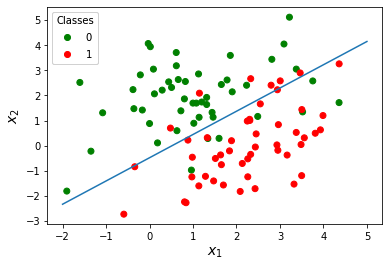

In [6]:
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


fig, ax = plt.subplots()

scatter = ax.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['green','red']))
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

#add the line plot
line_x1 = np.linspace(-2, 5, 100) #generate a series of x1 value

#calculate x2 based on x1. 
#f(x) = beta0 + beta1*x1 + beta2*x2. The Hyperplane is generated when f(x) = 0.5. Thus, after moving things around, beta2 = (0.5-beta0-beta1*x1)/beta2

line_x2 = (0.5 - beta0.value - beta1.value*line_x1)/(beta2.value)
line = ax.plot(line_x1,line_x2)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)

plt.show()
